In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

city_list = ['Barcelona','Beijing','Berlin','Chicago','HongKong','London','Madrid',
          'Mexico','Moscow','NewYork','Osaka','Paris','Seoul','Shanghai','Tokyo']
g = {}
for city in city_list:
    filename = 'SubwayData' + r'/' + city +'.net'
    g[city] = nx.read_pajek(filename)

1) Which are the cities with more and least stations in the largest connected component how many stations each have? In each of them what is the average number of connections per station? Draw them (3 pts)

In [2]:
# initiate min and max cities
min_city = city_list[0]
min_city_max_conns = max(dict(g[min_city].degree()).values())
max_city_max_conns = min_city_max_conns

# loop through each city
for city in city_list[1:]: # start at index 1 since we've already looked at index 0
    max_conns = max(dict(g[city].degree()).values())
    # check if max connections in this city is greater than max city's
    if max_conns > max_city_max_conns:
        max_city = city
        max_city_max_conns = max_conns
    # check if max connections in this city is greater than min city's
    if max_conns < min_city_max_conns:
        min_city = city
        min_city_max_conns = max_conns
        
print 'City with fewest connections at largest connected component: ' + min_city
print 'Number of connections: ' + str(min_city_max_conns)
print 'Average number of connections: ' + str(np.mean(dict(g[min_city].degree()).values()))
print 'City with most connections at largest connected component: ' + max_city
print 'Number of connections: ' + str(max_city_max_conns)
print 'Average number of connections: ' + str(np.mean(dict(g[max_city].degree()).values()))

City with fewest connections at largest connected component: HongKong
Number of connections: 4
Average number of connections: 1.6504854368932038
City with most connections at largest connected component: Tokyo
Number of connections: 9
Average number of connections: 2.2782608695652176


HongKong


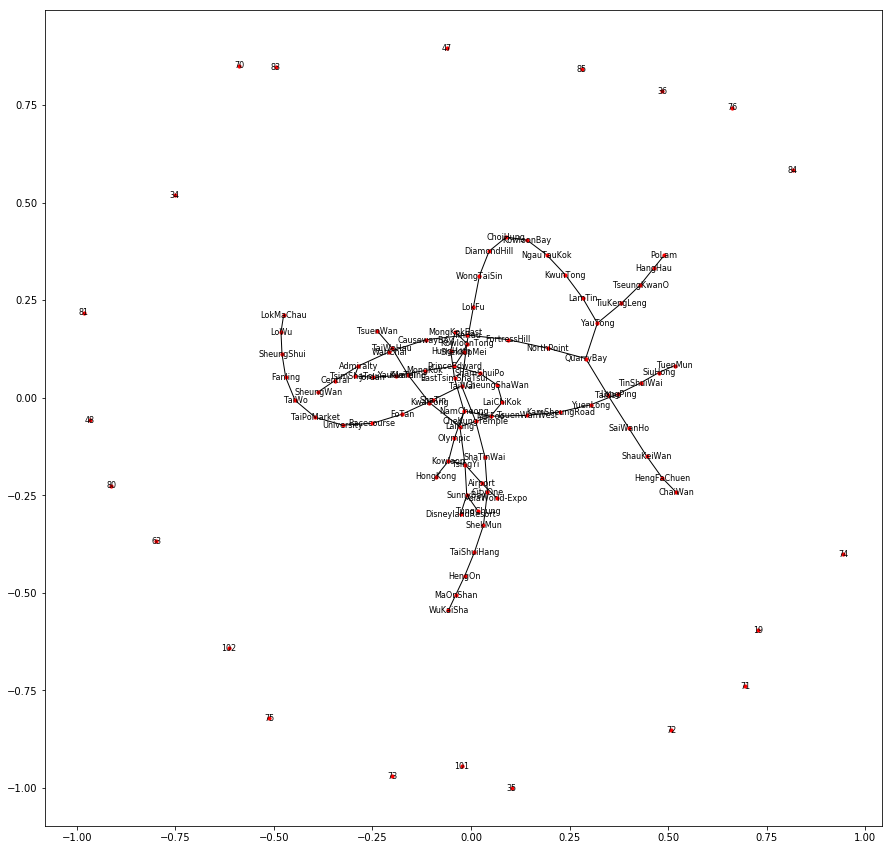

In [3]:
def charting(city):
    print(city)
    plt.figure(figsize=(15,15)) 
    nx.draw_networkx(g[city], node_size=10, font_size=8)
    plt.show()

charting(min_city)

Tokyo


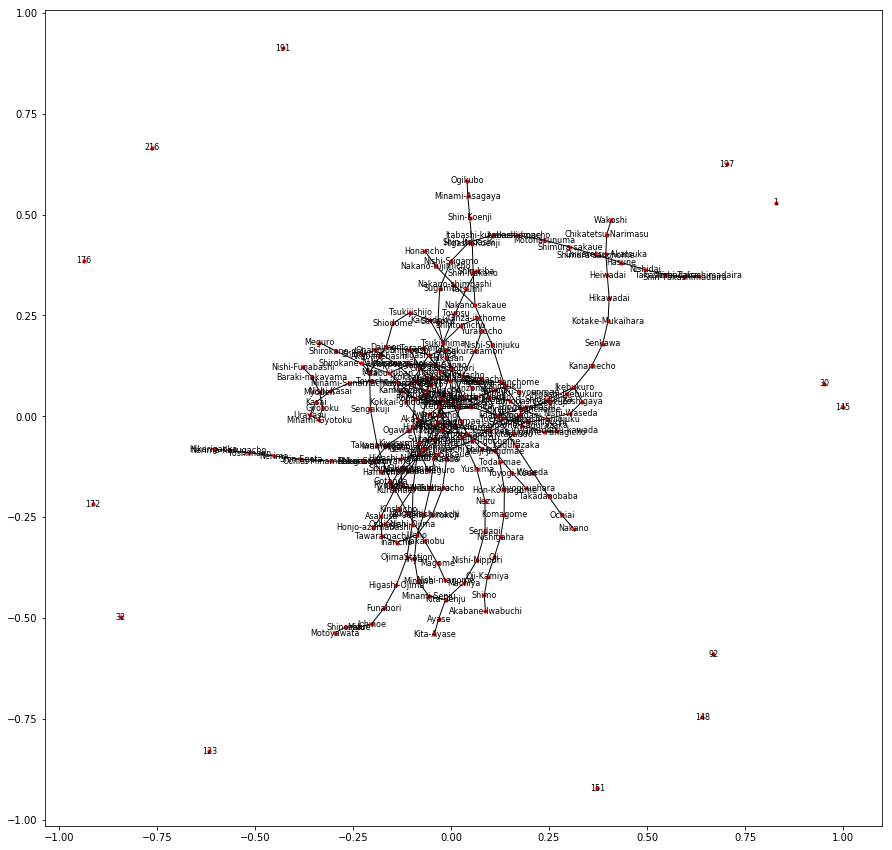

In [4]:
charting(max_city)

2) Plot the histograms of the connections per station of these two cities. Create axes labels and legends for showing your results with large enough fonts (3 pts)

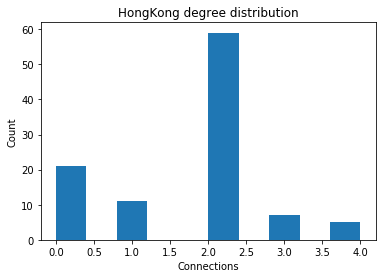

In [5]:
def histing(city):
    plt.figure()
    plt.hist(np.array(dict(g[city].degree()).values()))
    plt.title(city + ' degree distribution')
    plt.xlabel('Connections')
    plt.ylabel('Count')
    plt.show()
    
histing(min_city)

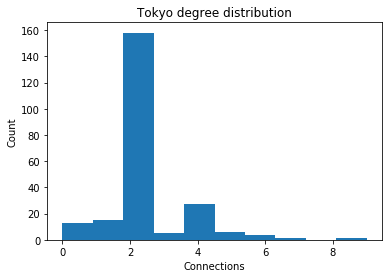

In [6]:
histing(max_city)

3) Write a piece of code to extract the longest [shortest] path(s) between two stations in the largest network. Write the path size, the name of each station in the path. (5 pts.)

In [7]:
sps = nx.shortest_path_length(g[max_city])

# initiate variables
longest_pair = ()
longest_length = 0
lengths = [] # for q4

# loop over all sources
for sp in sps:
    # loop over all targets from source
    for target in sp[1]:
        # record length of each source/target pair for q4
        lengths.append(sp[1][target])
        if sp[1][target] > longest_length:
            longest_length = sp[1][target]
            longest_pair = (sp[0], target)

print 'The longest shortest path in ' + max_city + ' is ' + str(longest_length) + ' units long with a path of:'
for station in nx.shortest_path(g[max_city], longest_pair[0], longest_pair[1]):
    print '   ' + station

The longest shortest path in Tokyo is 32 units long with a path of:
   Nishi-Funabashi
   Baraki-nakayama
   Myoden
   Gyotoku
   Minami-Gyotoku
   Urayasu
   Kasai
   Nishi-Kasai
   Minami-Sunamachi
   Toyocho
   Kiba
   Monzen-Nakacho
   Kayabacho
   Nihombashi
   Otemachi
   Jimbocho
   Suidobashi
   Kasuga
   Hakusan
   Sengoku
   Sugamo
   Nishi-Sugamo
   Shin-Itabashi
   Itabashi-kuyakushomae
   Itabashi-honcho
   Motohasunuma
   Shimura-sakaue
   Shimura-sanchome
   Hasune
   Nishidai
   Takashimadaira
   Shin-Takashimadaira
   Nishi-Takashimadaira


4) How many different paths does the largest network have (1 pt)

In [8]:
# halve to account for double counting of source/target and target/source pairings
print max_city + ' has ' + str(len(lengths)/2) + ' different paths'

Tokyo has 23551 different paths


5) Make the histograms of shortest path lengths(3 pts)

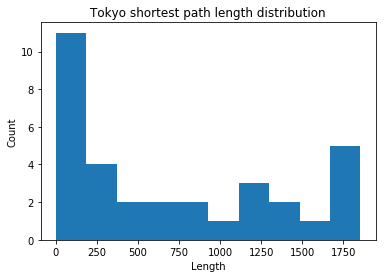

In [9]:
# count occurrences of each length
_, counts = np.unique(lengths, return_counts=True)

# due to double counting of source/target and target/source pairings, halve for true lengths
counts = counts/2

# plot histogram
plt.figure()
plt.hist(counts)
plt.title(max_city + ' shortest path length distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()